# **Dodo Alive ODrive**

Author: Timm Plagge

This Jupyter Notebook allows for easy testing of the ODrive, including visualizing data from the API in live graphs.
To use this file, you will need the ODrive and Jupyter prerequisites. This should all come preinstalled if you use the
Anaconda environment.

*This code was tested with ODrive 0.5.4 (not firmware version, the ODrive Python package), for Windows and MacOS.* We have noted that ODrive has been updating their software for their new ODrive Pro and has likely abandoned the ODrive v3.6, hence it's recommended you stick to this version.

In [ ]:
import matplotlib.pyplot as plt
import odrive
import time
import sys
import os

# Import the Python scripts in the motor_testing folder. By default it is in the same parent directory as jupyter folder
sys.path.append(os.path.abspath('../motor_testing'))

# Since motor_config erases data and restarts the ODrive, do not use it in the Jupyter notebook
# import motor_config
import motor_calibration
import test_closed_loop
import state_idle

## **Helper Functions (do not edit)**

In [ ]:
# Returns interface to ODrive. Prints to screen if it finds the ODrive
def find_ODrive():
    odrv = odrive.find_any()
    if odrv:
        print("ODrive found")
    return odrv

# Construct cum_data dictionary
def init_data_dict(cmds: list[str]) -> dict[str, list[None]]:    
    out_dict: dict[str, list[None]] = {key: [] for key in cmds}
    out_dict['time'] = []
    
    return out_dict


## **User defined functions**

In [ ]:
"""
query_ODrive: Takes a list of commands, and tells the ODrive to do something.
The actual implementation is here, the commands are listed in a cell below.
Note that commands here are executed every loop of the plot code, do not add
commands that should be run once here (there is another cell below for these)

Arguments:
    odrv : ODrive interface
    cmds : List of commands as strings 
Returns:
    data: Dictionary of output data. Keys are cmds, values are the data received (usually float or int)
""" 
def query_ODrive(odrv, cmds: list[str]) -> dict[str, None]:
    out: dict[str, None] = {}
    
    for c in cmds:
        if c == 'odrv.dodo.Ialpha':
            out['odrv.dodo.Ialpha'] = odrv.dodo.Ialpha
        elif c == 'odrv.dodo.Ibeta':
            out['odrv.dodo.Ibeta'] = odrv.dodo.Ibeta
        elif c == 'odrv.axis0.motor.current_control.Ialpha_measured':
            out['odrv.axis0.motor.current_control.Ialpha_measured'] = odrv.axis0.motor.current_control.Ialpha_measured
        elif c == 'odrv.axis0.motor.current_control.Ibeta_measured':
            out['odrv.axis0.motor.current_control.Ibeta_measured'] = odrv.axis0.motor.current_control.Ibeta_measured
        elif c == 'odrv.axis0.motor.current_meas_phA':
            out['odrv.axis0.motor.current_meas_phA'] = odrv.axis0.motor.current_meas_phA
        elif c == 'odrv.axis0.motor.current_meas_phB':
            out['odrv.axis0.motor.current_meas_phB'] = odrv.axis0.motor.current_meas_phB
        else:
            raise Exception('Unexpected command queried: {}. User must add these manually to query_ODrive function'.format(c))
    
        
    return out

## **Global Variables**

In [5]:
# ODrive interface. Will print 'ODrive found' if it finds the ODrive. 
# Remember, only one computer process can be connected to the ODrive at the same time, 
# so close other shells and odrivetool.
odrv = find_ODrive()

ODrive found


# Single Use Commands

The commands below should only be run once. Most of these functions are examples and you will find they are clunky
to use, we recommend you stick with using the Python scripts we provide directly.

In [5]:
# It is probably a better idea to run motor calibration and config manually, instead of using this Jupyter cell.
# If you don't set sleep, ODrive does not have time to run these commands before next command, will hang
# Note that two processes cannot be connected to the ODrive at the same time (i.e. if this Jupyter kernel is running
# and some Command Prompt.)

# motor_calibration.main()
# time.sleep(15)

In [6]:
# Have the motor turn a few times.
# test_closed_loop.run(50)

In [7]:
# The kill switch cell, make the motor stop. If this does not work (ex: you are querying data from the ODrive), unplug
# power supply.

state_idle.main()

searching odrive ... found


## **User variables**

In [11]:
# Commands to send to ODrive. Best to keep them as same name as actual command from ODrive API.
cmds: list[str] = [
    'odrv.axis0.motor.current_meas_phA',
    'odrv.axis0.motor.current_meas_phB',
    'odrv.axis0.motor.current_control.Ialpha_measured',
    'odrv.axis0.motor.current_control.Ibeta_measured'
]

# Cumulative data from ODrive (i.e. data from all queries)
# Also keeps a list of the relative time stamps of each query to the ODrive
cum_data: dict[str, None] = init_data_dict(cmds)

""" 
Desired time delay between ODrive readings in seconds, uses the time sleep function.
Sadly, this Jupyter notebook can only run as fast as your computer can plot graphs, 
so this is not the actual time between measurements. A future implementation might 
try to approach this problem differently.
"""
t_delay = 0.1

## Plot data live from ODrive

<IPython.core.display.Javascript object>


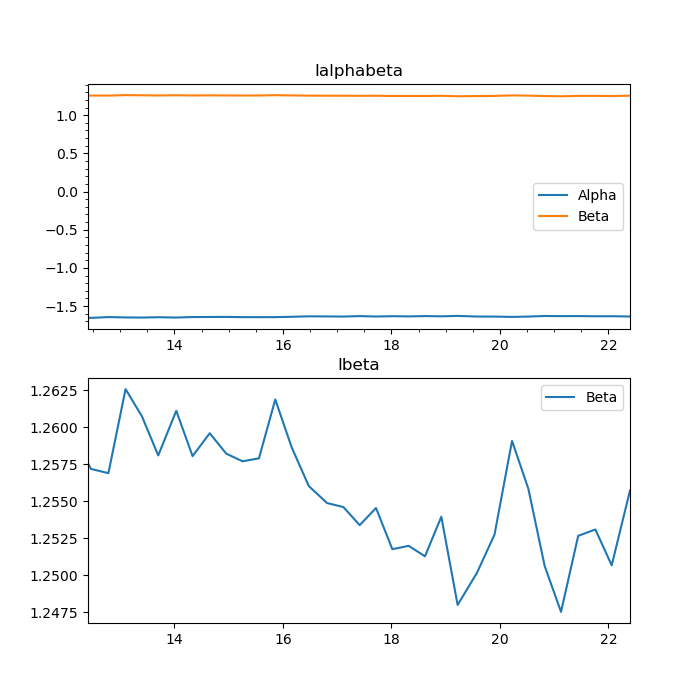

KeyboardInterrupt: 

In [12]:
%matplotlib notebook

# Settings for visualizing graphs

# Reset data when cell is run, or continue with previous data.
reset_data = True

# Add axes here if you want more plots, ex. fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
# figsize changes size of plot, adjust to your screen size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))
# Change figure size, use this to fit to your screen
fig.figsize = [8, 8]

# Limit X axis to a time range in seconds. If you record data longer, previous data will be cut off. Leave as None
# if you would like to show the full data from the ODrive. The complete data is still stored in cum_data
x_range = 10
# Do not edit these variables
plt.ion()
fig.show()
fig.canvas.draw()

if reset_data:
    time_passed = 0
    cum_data = {key: [] for key in cum_data}

# Keep track of elapsed time
time_passed = 0

while True:
    
    # Used to measure the actual elapsed time
    time_start = time.time()
    
    # Query ODrive for data, and add to dictionary
    cum_data['time'].append(time_passed)
    data = query_ODrive(odrv, cmds)
    for key, val in data.items():    
        cum_data[key].append(val)
    
    # Test if cum_data looks correct
    #print(cum_data)
    
    # Settings for the first plot
    
    #ax1.clear()
    #ax1.set_title("Current Measurement Phase A")
    #ax1.plot(cum_data['time'], cum_data['odrv.axis0.motor.current_meas_phA'], label='Phase A')
    #ax1.legend()
    #fig.canvas.draw()
    
    ax1.clear()
    ax1.set_title("Ialphabeta")
    ax1.plot(cum_data['time'], cum_data['odrv.axis0.motor.current_meas_phA'], label='Alpha')
    ax1.plot(cum_data['time'], cum_data['odrv.axis0.motor.current_meas_phB'], label='Beta')
    ax1.minorticks_on()
    #ax.xaxis.set_tick_params(which='minor', bottom=False)
    if x_range:
        ax1.set_xlim(cum_data['time'][-1] - x_range, cum_data['time'][-1])
    ax1.legend()
    fig.canvas.draw()
    
    # Settings for the second plot
    
    #ax2.clear()
    #ax2.set_title("Current Measurement Phase B")
    #ax2.plot(cum_data['time'], cum_data['odrv.axis0.motor.current_meas_phB'], label='Phase B')
    #ax2.legend()
    #fig.canvas.draw()
    
    ax2.clear()
    ax2.set_title("Ibeta")
    ax2.plot(cum_data['time'], cum_data['odrv.axis0.motor.current_meas_phB'], label='Beta')
    ax2.legend()
    if x_range:
        ax2.set_xlim(cum_data['time'][-1] - x_range, cum_data['time'][-1])
    fig.canvas.draw()
    
    # Sleep and increment time passed
    time.sleep(t_delay)
    
    time_end = time.time()
    elapsed_time = time_end - time_start    
    time_passed += elapsed_time
    # print(elapsed_time)
    
    

In [ ]:
# TODO: Add function that saves the data from cum_data to a json or txt file

In [ ]:
# TODO: Add feature that prints cum_data into a nice dataframe to look at